
# Polynomial Transformation and SVM on Moons Dataset

In this notebook, we explore how polynomial transformations are applied to the Moons dataset and how they affect the Support Vector Machine's (SVM) ability to classify data. The Moons dataset is a synthetic dataset that has a non-linear shape, making it a good candidate to demonstrate the effectiveness of polynomial transformations in SVM.



## Step 1: Generate and Visualize the Moons Dataset

First, we generate the Moons dataset using `sklearn.datasets.make_moons` and visualize it to understand its structure.


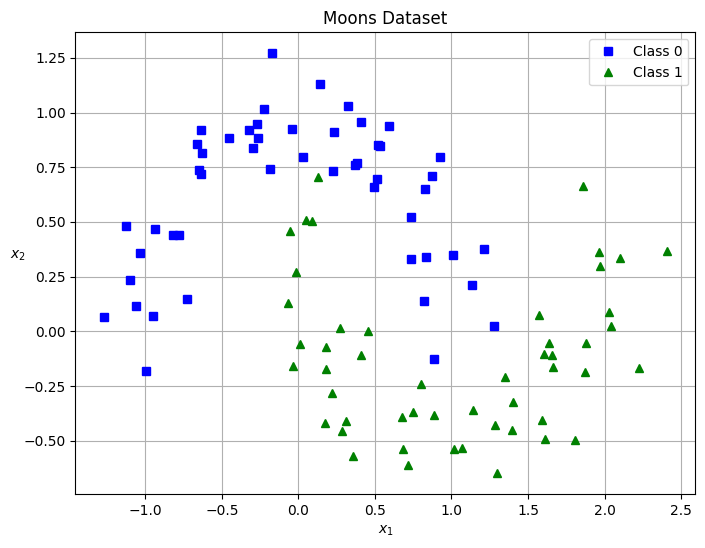

In [1]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

# Generate Moons dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation=0)
plt.title('Moons Dataset')
plt.legend()
plt.grid(True)
plt.show()



## Step 2: Apply Polynomial Transformation (Degree 3)

To capture the non-linear patterns in the data, we apply a polynomial transformation of degree 3. This transformation adds new features based on the original features, their squares, cubes, and interactions.


In [2]:

# Apply polynomial transformation and train SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])


The polynomial transformation of degree 3 adds the following features:

- Original features: $x_1$, $x_2$
- Polynomial terms up to degree 3: $x_1^2$, $x_1 x_2$, $x_2^2$, $x_1^3$, $x_1^2 x_2$, $x_1 x_2^2$, $x_2^3$

This results in a total of 10 features for each data point after removing the bias term.



## Step 3: Define Plotting Functions

We define two functions, `plot_dataset` and `plot_predictions`, to help visualize the dataset and the decision boundaries of the classifier.


In [3]:

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)



## Step 4: Visualize Decision Boundary of the Polynomial SVM

Now, we use the plotting functions to visualize the decision boundary of the polynomial SVM classifier.


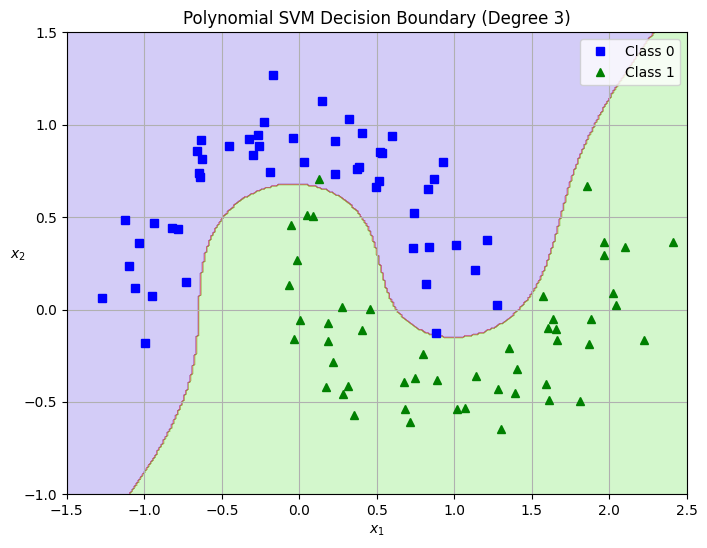

In [4]:

plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Polynomial SVM Decision Boundary (Degree 3)")
plt.show()



## Step 5: Train SVM with Polynomial Kernel and Visualize Decision Boundary

Alternatively, we can use an SVM with a polynomial kernel, which implicitly performs the polynomial transformation.


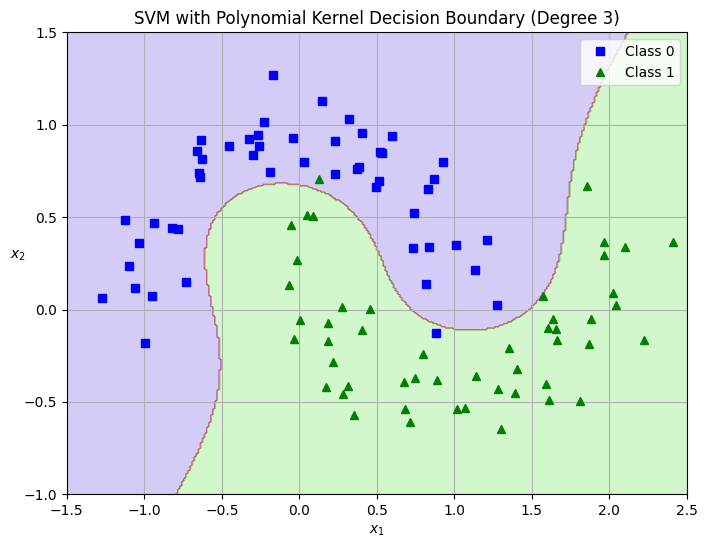

In [5]:

from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

# Plot decision boundary for SVM with polynomial kernel
plt.figure(figsize=(8, 6))
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("SVM with Polynomial Kernel Decision Boundary (Degree 3)")
plt.show()



The plots above show the decision boundaries created by:

1. **Polynomial SVM Classifier:** Uses explicit polynomial features followed by a linear SVM.
2. **SVM with Polynomial Kernel:** Uses a polynomial kernel to achieve similar results without explicitly transforming the features.

Both classifiers can capture the non-linear patterns in the Moons dataset effectively.



## Step 6: Comparison with Higher-Degree Polynomial Kernel

Let's see how changing the degree and coefficient of the polynomial kernel affects the decision boundary.


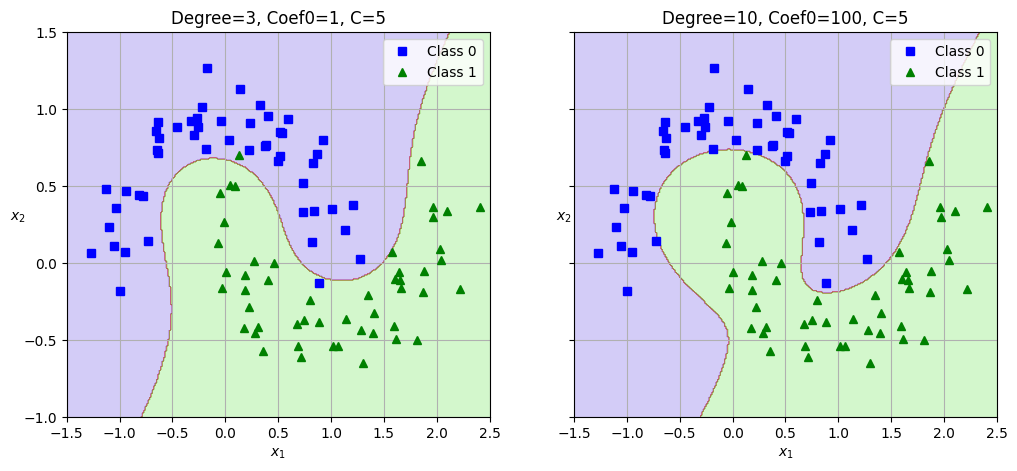

In [6]:

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

# Plot decision boundaries side by side
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Degree=3, Coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Degree=10, Coef0=100, C=5")

plt.show()



As the degree of the polynomial kernel increases, the decision boundary becomes more complex. However, setting a very high degree can lead to overfitting. The `coef0` parameter controls how much the model is influenced by high-degree polynomial terms.

- **Left Plot:** Degree 3 polynomial kernel.
- **Right Plot:** Degree 10 polynomial kernel with higher `coef0`.

The right plot shows a more complex decision boundary that closely fits the training data.



## Step 7: Comparison with Linear SVM

For comparison, let's train a linear SVM on the same data and observe how it performs without any polynomial transformations.


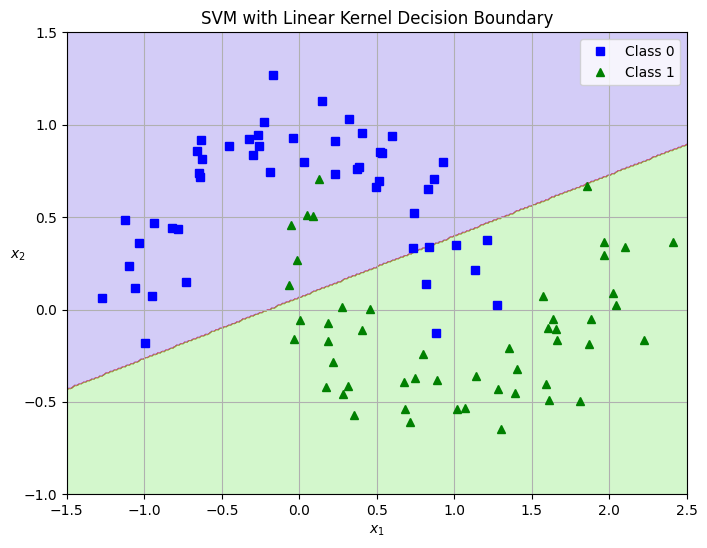

In [7]:

# Train SVM with linear kernel
svm_linear_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1)
)
svm_linear_clf.fit(X, y)

# Plot decision boundary for linear SVM
plt.figure(figsize=(8, 6))
plot_predictions(svm_linear_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("SVM with Linear Kernel Decision Boundary")
plt.show()



The linear SVM fails to capture the non-linear patterns in the data, resulting in a straight-line decision boundary that doesn't separate the classes effectively.
